# Técnicas de análise de agrupamento de dados

A análise de agrupamentos é uma técnica exploratória que visa identificar estruturas intrínsecas nos dados não rotulados. Essas técnicas são usadas para avaliar a qualidade dos agrupamentos e ajudar na interpretação dos resultados, auxiliando na tomada de decisões sobre o número ideal de clusters e na validação dos agrupamentos obtidos.

### Configuração de dados

In [1]:
# Importando biblioteca pandas
import pandas as pd

# Importando classe MinMaxScaler da biblioteca scikit-learn
from sklearn.preprocessing import MinMaxScaler

# Importando dados
df = pd.read_csv('dados/banana_quality.csv')

# Excluindo coluna qualitativa
df = df.drop('Quality', axis=1)

for coluna in df.columns:
    
    # Calculando mediana
    mediana_coluna = df[coluna].median()
    
    # Substitui os valores nulos pela mediana da coluna usando loc
    df.loc[df[coluna].isnull(), coluna] = mediana_coluna

    # Normalizando dados
    df[coluna] = MinMaxScaler().fit_transform(df[[coluna]])

# Visualizando dados
df.head(3)

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity
0,0.380309,0.626747,0.680712,0.360975,0.567312,0.671933,0.543416
1,0.349951,0.628093,0.485275,0.293682,0.481689,0.646850,0.545720
2,0.478460,0.699448,0.572694,0.283811,0.499358,0.716580,0.617337


### Davies-Bouldin Index

O Índice de Davies-Bouldin mede a similaridade média entre cada cluster e seu cluster mais próximo, avaliando a compactação e separação dos clusters. Quanto menor o índice, melhor a separação entre os clusters.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


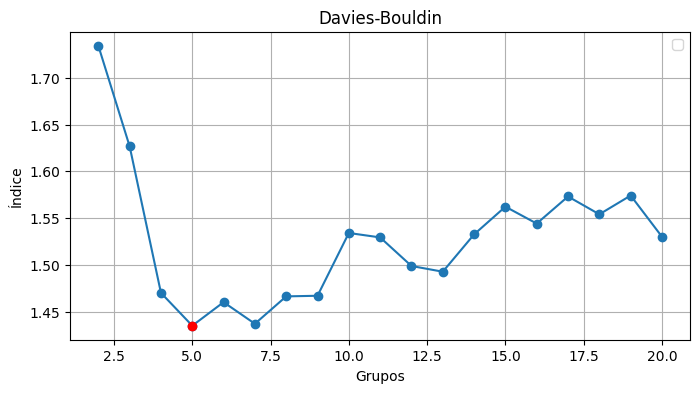

In [2]:
# Importando a classe KMeans do módulo cluster da biblioteca scikit-learn
from sklearn.cluster import KMeans

# Importando classe metrics da biblioteca scikit-learn
from sklearn import metrics

# Importando matplotlib
import matplotlib.pyplot as plt

# Calculando Davies-Bouldin para diferentes valores de k
valores_de_db = []
for k in range(2, 21):    
    km = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    indice_db = metrics.davies_bouldin_score(df, km.fit_predict(df))
    valores_de_db.append(metrics.davies_bouldin_score(df, km.fit_predict(df)))
    if k == 2:
        x_menor = 2
        y_menor = indice_db
    if indice_db < y_menor:
        x_menor = k
        y_menor = indice_db

# Plotando gráfico de Davies-Bouldin
plt.figure(figsize=(8, 4))
plt.plot(range(2, 21), valores_de_db, marker='o')
plt.title('Davies-Bouldin')
plt.xlabel('Grupos')
plt.ylabel('Índice')
plt.legend()
plt.grid(True)
plt.plot(x_menor, y_menor, 'ro')
plt.legend()
plt.show()

A conclusão do uso do método de Davies-Bouldin, é que o número ideal de agrupamentos é 5.

### Silhouette Score

Calcula o quão similar um objeto é ao seu próprio cluster (coesão) em comparação com outros clusters (separação). O score varia de -1 a 1, onde valores próximos de 1 indicam que o objeto está bem ajustado ao seu cluster.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


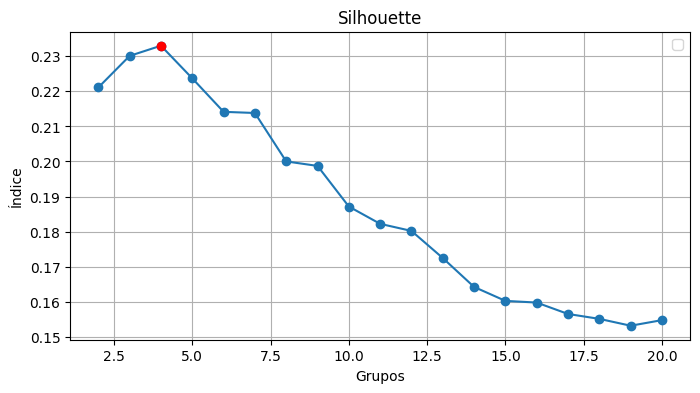

In [3]:
# Importando a classe silhouette_score do módulo metrics da biblioteca scikit-learn
from sklearn.metrics import silhouette_score

# Calculando silhouette para diferentes valores de k
valores_de_si = []
for k in range(2, 21):    
    km = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    indice_si = silhouette_score(df, km.fit_predict(df), metric='euclidean')
    valores_de_si.append(indice_si)
    if k == 2:
        x_menor = 2
        y_menor = indice_si
    if ((indice_si - 1)**2)**(1/2) < ((y_menor - 1)**2)**(1/2):
        x_menor = k
        y_menor = indice_si

# Plotando gráfico de Davies-Bouldin
plt.figure(figsize=(8, 4))
plt.plot(range(2, 21), valores_de_si, marker='o')
plt.title('Silhouette')
plt.xlabel('Grupos')
plt.ylabel('Índice')
plt.legend()
plt.grid(True)
plt.plot(x_menor, y_menor, 'ro')
plt.legend()
plt.show()

A conclusão do uso do método Silhouette, é que o número ideal de agrupamentos é 4.

### Método Elbow (do Cotovelo)

Ajuda a determinar o número ideal de clusters em um conjunto de dados, identificando o ponto de inflexão onde a adição de mais clusters não melhora significativamente a coesão intra-cluster.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


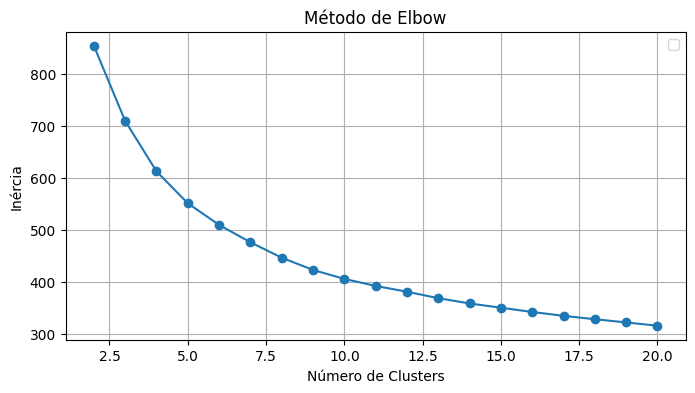

In [4]:
# Calculando a inércia para diferentes valores de k
inercias = []
for k in range(2, 21):
    km = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(df)
    inercias.append(km.inertia_)

# Plotando o gráfico de Elbow
plt.figure(figsize=(8, 4))
plt.plot(range(2, 21), inercias, marker='o')
plt.title('Método de Elbow')
plt.xlabel('Número de Clusters')
plt.ylabel('Inércia')
plt.legend()
plt.grid(True)
plt.show()

A conclusão do uso do método Elbow, é que o número ideal de agrupamentos está entre 5 e 7.

### Considerações Finais

A escolha do uso do método irá depender de uma série de fatores, que podem ser avaliados através de testes estatísticos ou de acurácia, visto que muitas vezes eles podem apresentar resultados contraditórios.